In [1]:
import pandas as pd
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\NBCData.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [4]:
X = df.drop('diabetes', axis=1)  # Features (glucose and bloodpressure)
y = df['diabetes']  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=150, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=150, random_state=42)

In [7]:
y_pred = adaboost_classifier.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.96%


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix:
[[86  7]
 [ 7 99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.93      0.93      0.93       106

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



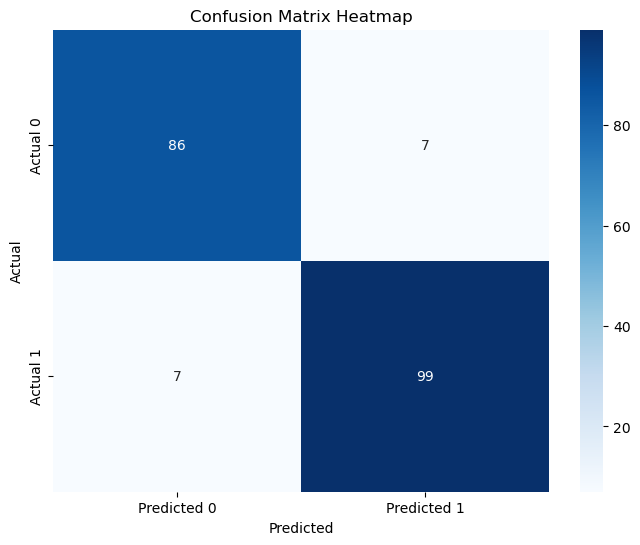

In [10]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()